# Sharp Ratio & Frontier

In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

## Portfolio Atual

In [2]:
itau = pd.read_csv('csv/ITUB4.csv')
abev = pd.read_csv('csv/ABEV3.csv')
usim = pd.read_csv('csv/USIM5.csv')
pmam = pd.read_csv('csv/PMAM3.csv')
flry = pd.read_csv('csv/FLRY3.csv')
pssa = pd.read_csv('csv/PSSA3.csv')
tiet = pd.read_csv('csv/TIET4.csv')

## Normalizando o retorno diário de cada ativo do portfólio

In [3]:
for acao_df in (itau, abev, usim, pmam, flry, pssa, tiet):
    acao_df['Retorno Normalizado'] = acao_df['Adj Close'] / acao_df.iloc[0]['Adj Close']

## Alocando cada ativo com um peso específico

In [4]:
# pesos = [0.30685331, 0.00641836, 0.06383855, 0.06783421, 0.00519073, 0.37586239, 0.17400245]
pesos = [0.32492868, 0.00764669, 0.05838742, 0.05361701, 0.01495727, 0.29189387, 0.24856906]

for acao_df, alocacao in zip((itau, abev, usim, pmam, flry, pssa, tiet), pesos):
    acao_df['Alocacao'] = acao_df['Retorno Normalizado'] * alocacao

## Posição de cada ativo no portfólio

In [5]:
for acao_df in (itau, abev, usim, pmam, flry, pssa, tiet):
    acao_df['Posicao'] = acao_df['Alocacao'] * 10000

In [6]:
todas_posicoes = [itau['Posicao'], abev['Posicao'], usim['Posicao'],
                  pmam['Posicao'], flry['Posicao'], pssa['Posicao'], tiet['Posicao']]

# DF que terá colunas adicionadas como Total e Retorno Diário
portfolio_posicao = pd.concat(todas_posicoes, axis=1)

# DF que terá apenas as ações com o Adj Close column
portfolio_acoes = pd.concat(todas_posicoes, axis=1)

In [7]:
portfolio_posicao.columns = ['ITUB', 'ABEV', 'USIM', 'PMAM', 'FLRY', 'PSSA', 'TIET']
portfolio_acoes.columns = ['ITUB', 'ABEV', 'USIM', 'PMAM', 'FLRY', 'PSSA', 'TIET']

## Desempenho da carteira

In [8]:
portfolio_posicao['Total'] = portfolio_posicao.sum(axis=1)
portfolio_posicao.drop(labels='Total', axis=1, inplace=True)
portfolio_posicao['Total'] = portfolio_posicao.sum(axis=1)

In [9]:
print('Investimento inicial:')
print(portfolio_posicao['Total'][0])
print('Investimento final:')
print(round(portfolio_posicao['Total'].iloc[-1], 2))

Investimento inicial:
10000.0
Investimento final:
13542.52


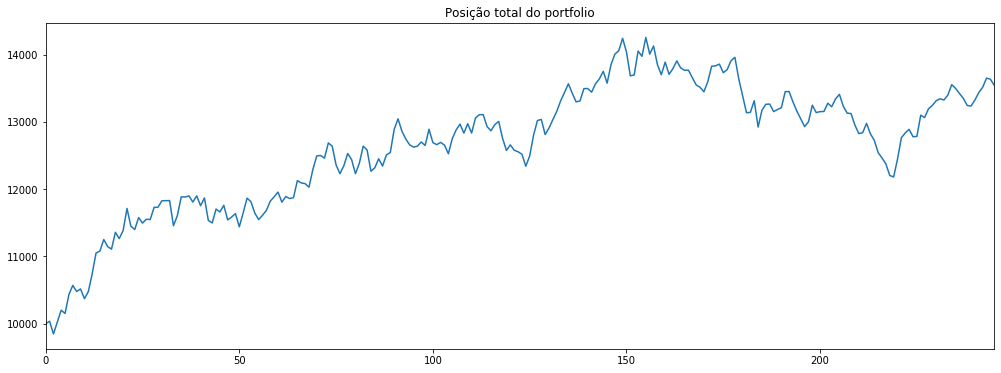

In [10]:
portfolio_posicao['Total'].plot(figsize=(17,6))
plt.title('Posição total do portfolio');

## Desempenho da Carteira Normalizada

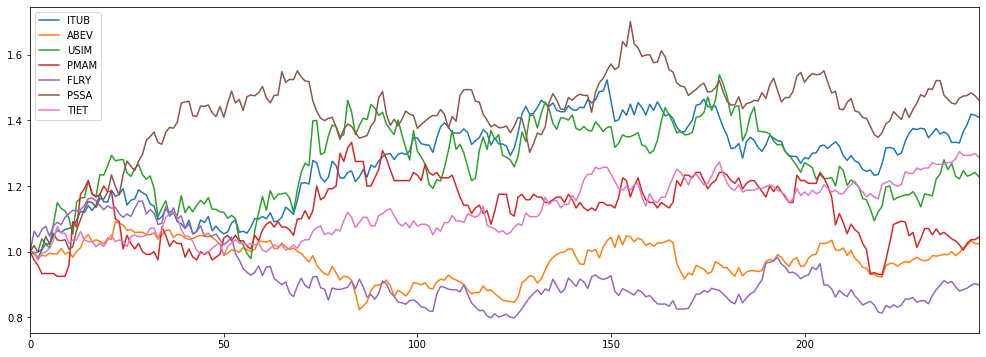

In [11]:
portfolio_normalizado = portfolio_acoes / portfolio_acoes.iloc[0]
portfolio_normalizado.plot(figsize=(17,6));

## Retorno diário da carteira

In [12]:
portfolio_posicao['Retorno Diario'] = portfolio_posicao['Total'].pct_change(1)

In [20]:
# Média de retorno diário
round_ret_medio_diario = round(portfolio_posicao['Retorno Diario'].mean() * 100, 2)
print('Essa carteira rende em média {}% diariamente'.format(round_ret_medio_diario))

Essa carteira rende em média 0.13% diariamente


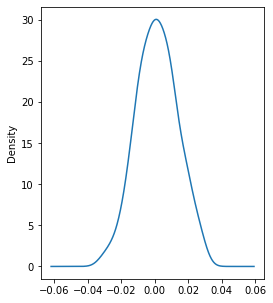

In [14]:
# Gráfico de densidade
portfolio_posicao['Retorno Diario'].plot(kind='kde', figsize=(4,5));

## Retorno Total da Carteira

In [19]:
retorno_total_acumulado = 100 * (portfolio_posicao['Total'].iloc[-1] / portfolio_posicao['Total'].iloc[0] - 1)
round_ret_total_acum = round(retorno_total_acumulado, 2)
print('Essa carteira rendeu {}%'.format(round_ret_total_acum))

Essa carteira rendeu 35.43%
